In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.multivariate.manova import MANOVA

import matplotlib.pyplot as plt

## Task 1

Таблиця 3.1. Дослідіти модель лінійної регресії $y_1$ на $x_1$.

In [2]:
data = np.loadtxt('T3_1_HEIGHTWT.dat', dtype=int)[:, 1:]
data.shape

(20, 2)

In [3]:
X, y = data[:, 0], data[:, 1]
X = X[:, None]
X = sm.add_constant(X)

## Train model

In [4]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     67.97
Date:                Sat, 07 May 2022   Prob (F-statistic):           1.59e-07
Time:                        12:34:02   Log-Likelihood:                -84.962
No. Observations:                  20   AIC:                             173.9
Df Residuals:                      18   BIC:                             175.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -467.0372     76.730     -6.087      0.0

+ reject $H_0$ for F-test: all of the regression coefficients are equal to zero
+ for each coef we reject $H_0$ for t-test: $\beta$ = 0 (no relationship between the predictor variable and the response variable)
+ we have good $R^2$ (variance for a dependent variable that's explained by an independent variable)

In [5]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  [-467.03719083    8.84166817]
R2:  0.7906235292867811


## Plot the prediction

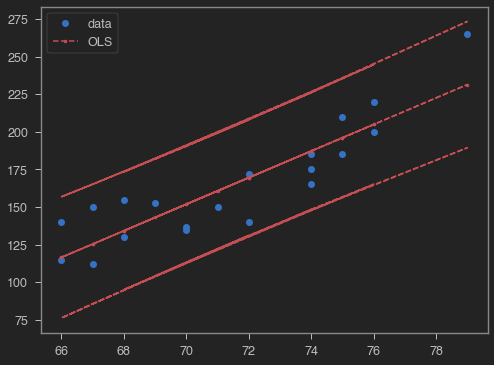

In [6]:
pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(X[:, 1], y, "o", label="data")
ax.plot(X[:, 1], results.fittedvalues, "r--.", label="OLS")
ax.plot(X[:, 1], iv_u, "r--")
ax.plot(X[:, 1], iv_l, "r--")
ax.legend(loc="best");

eval_env: 1


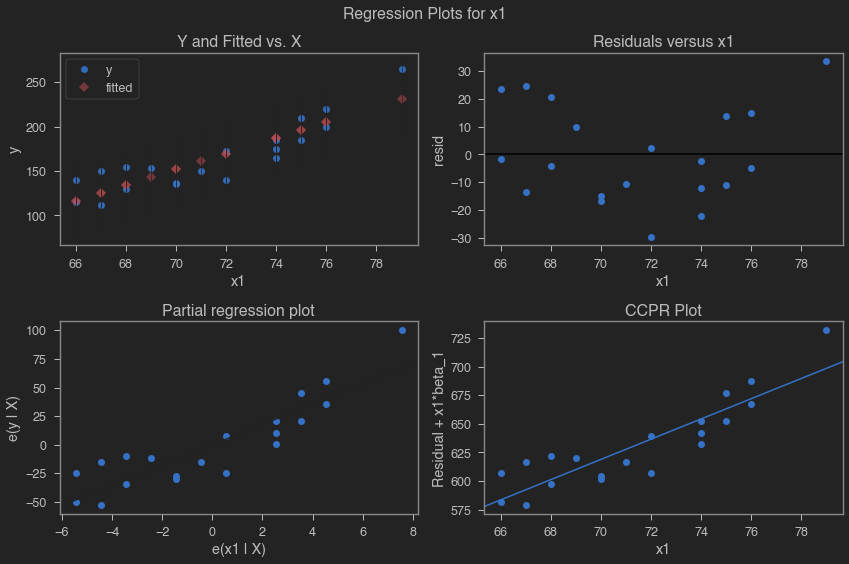

In [7]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, 'x1', fig=fig)

## Task 2

Таблиця 3.4. Дослідити модель множинної регресії $y_1$ на $(x_1, x_2, x_3)$

In [8]:
data = np.loadtxt('T3_4_DIABETES.dat', dtype=float)[:, 1:]
data.shape

(46, 5)

In [9]:
X, y = data[:, 2:], data[:, 0]
X = sm.add_constant(X)

## Train model

In [10]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     4.877
Date:                Sat, 07 May 2022   Prob (F-statistic):            0.00534
Time:                        12:34:04   Log-Likelihood:                 36.957
No. Observations:                  46   AIC:                            -65.91
Df Residuals:                      42   BIC:                            -58.60
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6264      0.176      3.565      0.0

+ reject $H_0$ for F-test: all of the regression coefficients are equal to zero
+ for coef **x1** we accept t-test $H_0$ ($\alpha = 0.05$): $\beta$ = 0 (no relationship between the predictor variable and the response variable)
+ we have a bad $R^2$ (variance for a dependent variable that's explained by an independent variable)

In [11]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  [ 0.62639028  0.00090822 -0.00095571  0.00148974]
R2:  0.25834168650748335


## Residual plot

eval_env: 1


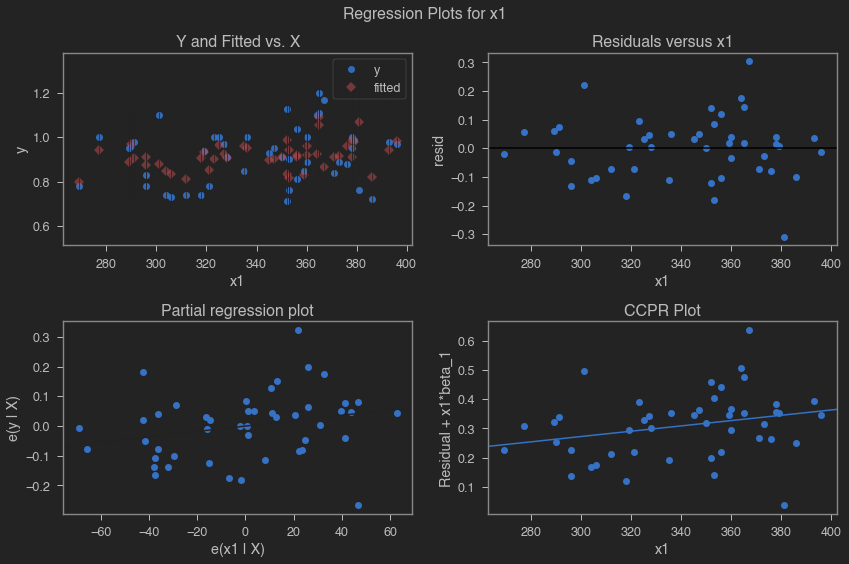

In [12]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, 'x1', fig=fig)

eval_env: 1


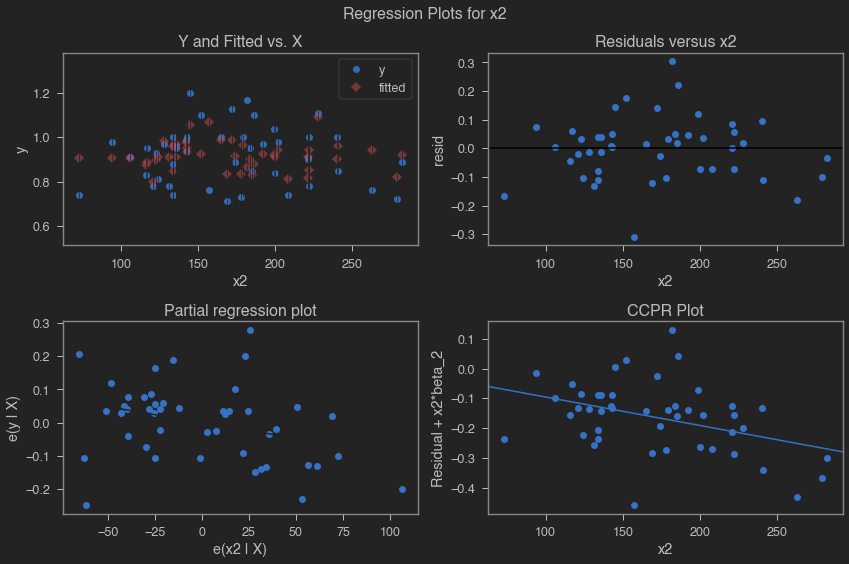

In [13]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, 'x2', fig=fig)

eval_env: 1


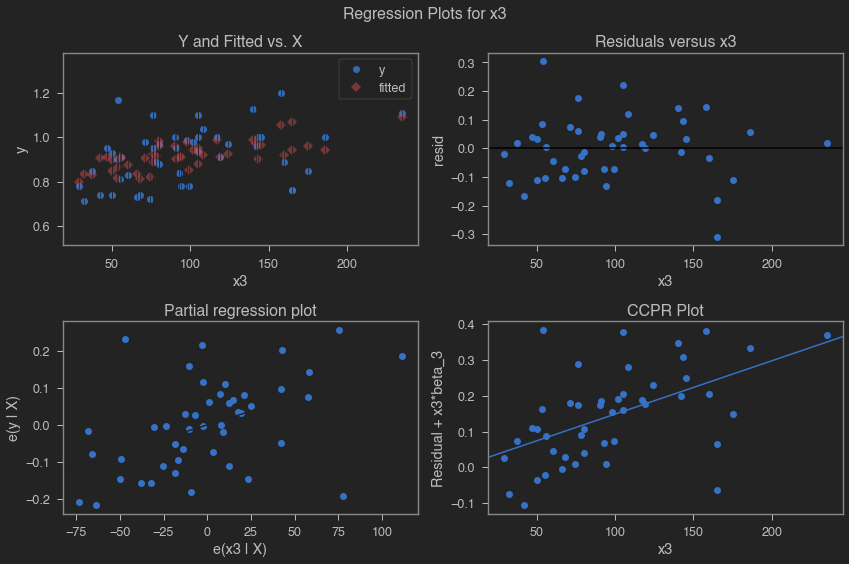

In [14]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, 'x3', fig=fig)

## Task 3

Таблиця 3.4. Дослідити модель багатовимірної множинної регресії $(y_1,y_2)$ на $(x_1,x_2,x_3)$.

In [15]:
data = np.loadtxt('T3_4_DIABETES.dat', dtype=float)[:, 1:]
data.shape

(46, 5)

In [16]:
X, y = data[:, 2:], data[:, :2]
X = sm.add_constant(X)

In [17]:
model = LinearRegression().fit(X, y)

In [18]:
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)
print('Score:', model.score(X, y))

Intercept: 
 [ 0.62639028 83.24254057]
Coefficients: 
 [[ 0.          0.00090822 -0.00095571  0.00148974]
 [ 0.          0.02870058 -0.01272444 -0.00440592]]
Score: 0.13731609396387745


In [19]:
# endog : Dependent variables
# exog : Independent variables.

# Pillai's trace is a positive-valued statistic. Increasing values of the statistic indicate effects that contribute more to the model.
# Wilks' Lambda is a positive-valued statistic that ranges from 0 to 1. Decreasing values of the statistic indicate effects that contribute more to the model.
# Hotelling's trace is the sum of the eigenvalues of the test matrix. It is a positive-valued statistic for which increasing values indicate effects that contribute more to the model.
# Roy’s Largest Root is a positive-valued. Increasing values for the statistic indicate increasing contributions by effects to the model in question. In general, large values indicate you should reject the null hypothesis

manova_model = MANOVA(endog=y, exog=X)
print(manova_model.mv_test())

                 Multivariate linear model
                                                            
------------------------------------------------------------
           x0           Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.4891 2.0000 41.0000 21.4134 0.0000
         Pillai's trace 0.5109 2.0000 41.0000 21.4134 0.0000
 Hotelling-Lawley trace 1.0446 2.0000 41.0000 21.4134 0.0000
    Roy's greatest root 1.0446 2.0000 41.0000 21.4134 0.0000
------------------------------------------------------------
                                                            
------------------------------------------------------------
           x1           Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.9310 2.0000 41.0000  1.5188 0.2310
         Pillai's trace 0.0690 2.0000 41.0000  1.5188 0.2310
 Hotelling-Lawley trace 0.0741 2.0000 41.0

+ for $x_1$ and $x_2$ we reject $H_0$, which means that these variables doesn't contribute to our model